# Трофимова Анастасия БЭК213

In [2]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
import math

## Задача 1, пункт а

1. Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n таксистов Самарканда всегда на работе и приезжают равновероятно.

а) [5] Постройте график функции правдоподобия как функции от общего количества такси n. Найдите оценку числа n методом максимального правдоподобия.

Сначала найдем вероятность того, что в первый день приедет новый таксист. Она равна 1.

Во второй день такая вероятность будет равна:
$$P2 = \frac {n-1}{n}$$
В третий день:
$$P3 =\frac {n-2}{n}$$ \
В десятый день:
$$P10 =\frac {9}{n}$$ 
То есть, в i день:
$$Pi =\frac {n-i+1}{n}$$ 

In [157]:
def Likelihood(n, d):
    L = 1
    for i in range(2, d):
        L *= (n - i + 1)/n
    L *= (d-1)/n
    return L    

In [158]:
nVal = np.arange(9, 1001)
LVal = []

for j in range(9, 1001):
    LVal.append(Likelihood(j, 10))          

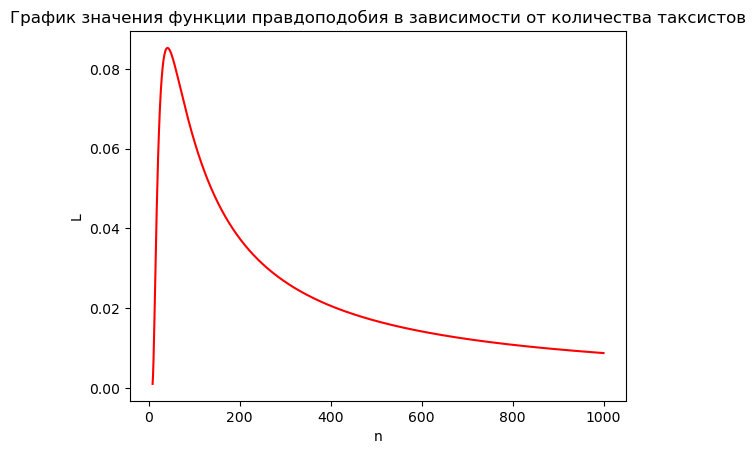

In [159]:
plt.plot(nVal, LVal, color = 'red') 
plt.xlabel("n")
plt.ylabel("L")
plt.title('График значения функции правдоподобия в зависимости от количества таксистов');

In [160]:
max_ind =np.argmax(LVal)
n_ML = nVal[max_ind]
print('n_ML =', n_ML) #Оценка n методом максимального правдоподобия

n_ML = 42


## Пункт б

б) [5] Постройте график математического ожидания номера заказа, на котором происходит первый повторный приезда, как функции от общего количества такси n. Найдите оценку числа n методом моментов.

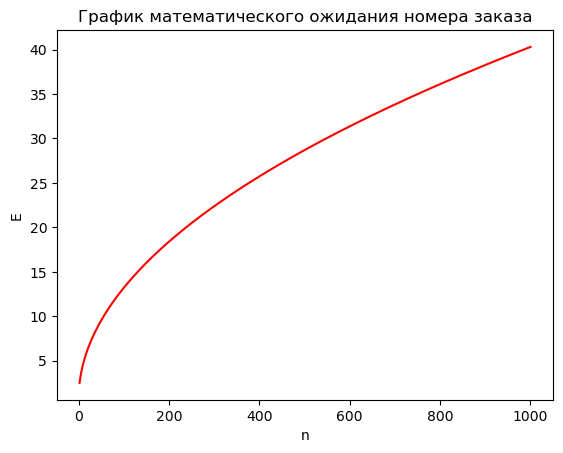

In [161]:
#Cчитаю вероятность для каждого дня
def pr(n, d):
    P = 1
    for i in range(2, d):
        P *= (n - i + 1)/n
    P *= (d-1)/n
    return P

#Cчитаю математическое ожидание номера заказа при первом повторном приезде
def E(n):
    E = 0
    for i in range(2, n + 2):
        E += i * pr(n, i)
    return E

E1 = []
nVal = np.arange(2, 1001)
for n in nVal:
    E1.append(E(n))


plt.plot(nVal, E1, color='red')
plt.xlabel('n')
plt.ylabel('E')
plt.title('График математического ожидания номера заказа');

In [162]:
#Методом моментов предполагаем, что реальное мат. ожидание равно 10

def nearest(lst, target):
    return min(lst, key=lambda x: abs(x-target))

nearest = nearest(E1, 10)

ind = E1.index(nearest)
n_MM = nVal[ind]
print('n_MM =', n_MM)

n_MM = 55


## Пункт в

в) [15] Предположим, что настоящее n равно 100. Проведя 10000 симуляций вызовов такси до первого повторного, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

In [3]:
n_taxi = 100
n_sim = 10**4
days = []
np.random.seed(100)

for i in range(n_sim):
    ls = []
    taxi = np.random.randint(1, n_taxi)
    
    while taxi not in ls:
        ls.append(taxi)
        taxi = np.random.randint(1, n_taxi)
        
    days.append(len(ls) + 1)
days[:10]  #Дни, в которые водитель повторялся

[13, 18, 23, 14, 5, 10, 18, 15, 21, 15]

In [164]:
#ML оценка

ML = []

for j in days:
    n = np.arange(j - 1, 1000)
    L = np.array([Likelihood(i, j) for i in n])
    ml = n[L.argmax()]
    ML.append(ml)
    
#MM оценка
    mm = E1.index(min(E1, key=lambda x: abs(x-j))) + 1
    MM.append(mm)

Смещение = -5.505799999999994
Дисперсия = 8028.38376636
Cреднеквадратичная ошибка = 8058.6976


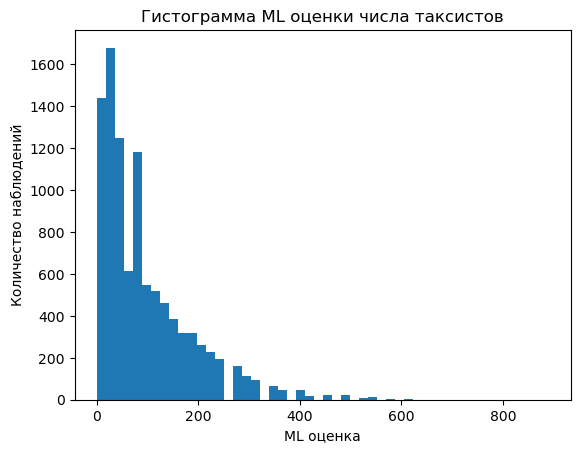

In [165]:
#ML оценка

plt.hist(ML, bins = 50);
plt.xlabel('ML оценка')
plt.ylabel('Количество наблюдений')
plt.title('Гистограмма ML оценки числа таксистов');

print('Смещение =', np.mean(ML) - n_taxi)
print('Дисперсия =', np.var(ML))
print('Cреднеквадратичная ошибка =', np.mean((np.array(ML) - n_taxi)**2))

Смещение = 22.43974
Дисперсия = 13725.0605687324
Cреднеквадратичная ошибка = 14228.6025


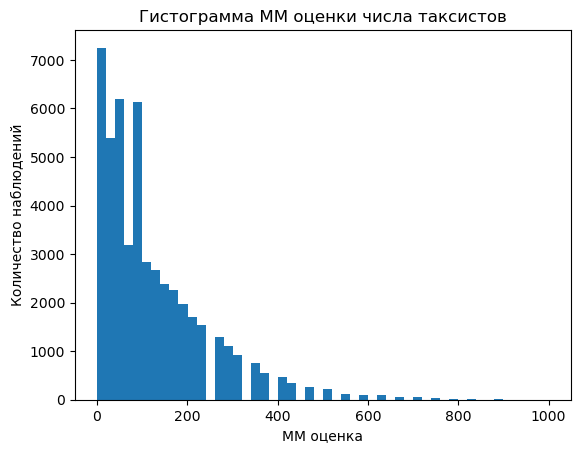

In [166]:
#ММ оценка

plt.hist(MM, bins = 50);
plt.xlabel('MM оценка')
plt.ylabel('Количество наблюдений')
plt.title('Гистограмма MM оценки числа таксистов');

print('Смещение =', np.mean(MM) - n_taxi)
print('Дисперсия =', np.var(MM))
print('Cреднеквадратичная ошибка =', np.mean((np.array(MM) - n_taxi)**2))

## Задача 3, пункт а

3. Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для математического ожидания несколькими способами: классический асимптотический нормальный интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.

а) [15]Для каждого способа с помощью 10000 симуляций оцените вероятность того,что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание, если наблюдения распределены экспоненциально с интенсивностью 1.
 

In [167]:
#Генерирую 10000 симуляций для 20 наблюдений
lamb = 1

from scipy.stats import expon

expon1 = expon.rvs(scale= 1/lamb , size= (10000, 20), random_state = 100)
expon1

array([[0.78395837, 0.32624188, 0.55254662, ..., 0.18867089, 1.69404173,
        0.32030685],
       [0.56511319, 2.81390783, 1.70182395, ..., 0.06181369, 2.2122504 ,
        0.86015027],
       [1.35665668, 0.99474952, 0.87189639, ..., 0.2714075 , 0.04589974,
        0.70406947],
       ...,
       [0.76643399, 1.60404126, 0.71556678, ..., 2.31858697, 0.61907206,
        2.65984314],
       [0.26956847, 0.20335118, 1.04603558, ..., 2.07465807, 0.76489828,
        0.38859838],
       [1.32774577, 3.37249292, 0.80131231, ..., 1.83637912, 2.13035376,
        0.86026547]])

In [168]:
#Классический асимптотический нормальный интервал
cover1 = 0

for i in expon1:
    CI = sts.norm.interval(alpha=0.95, loc=np.mean(i), scale=np.std(i, ddof = 1)/np.sqrt(20))
    
    if CI[1] > 1/lamb and CI[0] < 1/lamb:
        cover1 += 1
        
prob = cover1/10000
print('Вероятность того, что доверительный интервал покрывает мат. ожидание равна', prob)

/var/folders/yh/nr2k5yls75j6ys5k4rrqtk0h0000gn/T/ipykernel_41317/2915419189.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI = sts.norm.interval(alpha=0.95, loc=np.mean(i), scale=np.std(i, ddof = 1)/np.sqrt(20))


Вероятность того, что доверительный интервал покрывает мат. ожидание равна 0.9014


In [169]:
#Наивный бутстрэп
np.random.seed(100)

alpha = 0.05

cover2 = 0
for i in expon1:
    nboots = np.random.choice(i, size = (10000, 20))
    boots_mean = nboots.mean(axis = 1)
    z_l, z_r = np.quantile(boots_mean, alpha/2), np.quantile(boots_mean, 1 - alpha/2)
    CI = [z_l, z_r]
    
    if CI[1] > 1/lamb and CI[0] < 1/lamb:
        cover2 += 1
        
prob = cover2/10000
print('Вероятность того, что доверительный интервал покрывает мат. ожидание равна', prob)

Вероятность того, что доверительный интервал покрывает мат. ожидание равна 0.9017


In [170]:
#Бутстрэп t-статистики
np.random.seed(100)
cover3 = 0

for i in expon1:
    nboots = np.random.choice(i, size = (10000, 20))
    final_boots = (np.mean(nboots, axis = 1) - np.mean(i))/np.std(nboots, axis = 1, ddof = 1)
    q_l, q_r = np.quantile(final_boots, alpha/2), np.quantile(final_boots, 1 - alpha/2)
    CI = [np.mean(i) - q_r*np.std(i), np.mean(i) - q_l*np.std(i)]
    
    if CI[1] > 1/lamb and CI[0] < 1/lamb:
        cover3 += 1
        
prob = cover3/10000
print('Вероятность того, что доверительный интервал покрывает мат. ожидание равна', prob)  

Вероятность того, что доверительный интервал покрывает мат. ожидание равна 0.9402


## Пункт б

б) [5]Пересчитайте вероятности накрытия, если наблюдения имеют распределение Стьюдента с тремя степенями свободы.

In [171]:
#Математическое ожидание распределения Стьюдента равно 0
t1 = sts.t.rvs(3, size = (10000, 20), random_state = 100) 
t1

array([[-1.70633623,  0.61010003,  0.45753218, ...,  3.95862541,
         2.34665412, -0.94310449],
       [ 0.81852816, -0.48391289,  0.01380029, ..., -1.61499121,
        -1.78498184,  0.44618923],
       [-1.5181203 ,  5.44389927,  4.17743903, ..., -0.48422765,
        -0.83697192,  0.50702557],
       ...,
       [ 0.05604395, -0.12751167,  1.52227549, ..., -0.03878796,
        -0.56762923, -0.577323  ],
       [ 3.98154819,  1.18915997, -1.18440462, ...,  0.23450136,
         0.02335841, -0.59321936],
       [ 0.13855379, -2.14928298, -0.82355492, ...,  1.84233008,
        -1.1720065 ,  1.73662431]])

In [172]:
#Классический асимптотический нормальный интервал
cover1 = 0

for i in t1:
    CI = sts.norm.interval(alpha=0.95, loc=np.mean(i), scale=np.std(i, ddof = 1)/np.sqrt(20))
    
    if CI[1] > 0 and CI[0] < 0:
        cover1 += 1
        
prob = cover1/10000
print('Вероятность того, что доверительный интервал покрывает мат. ожидание равна', prob)

/var/folders/yh/nr2k5yls75j6ys5k4rrqtk0h0000gn/T/ipykernel_41317/2665772778.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI = sts.norm.interval(alpha=0.95, loc=np.mean(i), scale=np.std(i, ddof = 1)/np.sqrt(20))


Вероятность того, что доверительный интервал покрывает мат. ожидание равна 0.9448


In [173]:
#Наивный бутстрэп
np.random.seed(100)

alpha = 0.05

cover2 = 0
for i in t1:
    nboots = np.random.choice(i, size = (10000, 20))
    boots_mean = nboots.mean(axis = 1)
    z_l, z_r = np.quantile(boots_mean, alpha/2), np.quantile(boots_mean, 1 - alpha/2)
    CI = [z_l, z_r]
    
    if CI[1] > 0 and CI[0] < 0:
        cover2 += 1
        
prob = cover2/10000
print('Вероятность того, что доверительный интервал покрывает мат. ожидание равна', prob)

Вероятность того, что доверительный интервал покрывает мат. ожидание равна 0.9239


In [174]:
#Бутстрэп t-статистики
np.random.seed(100)
cover3 = 0

for i in t1:
    nboots = np.random.choice(i, size = (10000, 20))
    final_boots = (np.mean(nboots, axis = 1) - np.mean(i))/np.std(nboots, axis = 1, ddof = 1)
    q_l, q_r = np.quantile(final_boots, alpha/2), np.quantile(final_boots, 1 - alpha/2)
    CI = [np.mean(i) - q_r*np.std(i), np.mean(i) - q_l*np.std(i)]
    
    if CI[1] > 0 and CI[0] < 0:
        cover3 += 1
        
prob = cover3/10000
print('Вероятность того, что доверительный интервал покрывает мат. ожидание равна', prob)  

Вероятность того, что доверительный интервал покрывает мат. ожидание равна 0.9213


## Пункт в

в) [5] Какой способ оказался лучше?

Если наблюдения распределены экспоненциально с интенсивностью 1, то лучшим способом оказывается бутстрэп t-статистики, в нем вероятность покрытия мат. ожидания равна 0.94.

Если наблюдения имеют распределение Стьюдента с тремя степенями свободы, то лучшим способом оказывается классический асимптотический нормальный интервал, в нем вероятность покрытия мат. ожидания равна 0.95.

## Задача 4, пункт а

4. Проверьте гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернативной гипотезы возьмите гипотезу о неравенстве.

а) [5] Используйте тест Уэлча.

В каждом случае укажите P -значение и статистический вывод для уровня значимости 5%.

In [175]:
df = pd.read_csv('22-23_hse_probability - Exam.csv')
df = df.drop(labels = [0,1,2,3,4],axis = 0)
df = df[['Last name', 'Unnamed: 72']]
df = df.rename(columns = {'Unnamed: 72': 'Score'})
df

,Last name,Score
5,Репенкова,16.0
6,Ролдугина,0.0
7,Сафина,19.0
8,Сидоров,26.0
9,Солоухин,21.0
...,...,...
332,Сенников,19.0
333,Ся,0.0
334,Сятова,0.0
335,Темиркулов,0.0


In [176]:
#таблица с фамилиями на гласную букву
df_gl = df[df['Last name'].str.startswith(('А', 'Е', "Ё", "И", "О", "У", "Ы", "Э", "Ю", "Я"))]
#таблица с фамилиями на согласную букву
df_sogl = df[~df['Last name'].str.startswith(('А', 'Е', "Ё", "И", "О", "У", "Ы", "Э", "Ю", "Я"))]

In [177]:
#Проверяем гипотезу о равенстве мат ожиданий(H0), так как тест Уэлча, то дисперсии не равны и equal_var = False
from scipy.stats import ttest_ind

t = ttest_ind(df_gl['Score'], df_sogl['Score'], equal_var = False)
print('P-value =', t[1])
print('Гипотеза H0 не отвергается, так как p-value больше уровня значимости')

P-value = 0.3974027153843839
Гипотеза H0 не отвергается, так как p-value больше уровня значимости


## Пункт б
б) [5] Используйте наивный бутстрэп.

In [178]:
np.random.seed(100)
alpha = 0.05

nboots1 = np.random.choice(df_gl['Score'], size = (10000, len(df_gl)))
nboots2 = np.random.choice(df_sogl['Score'], size = (10000, len(df_sogl)))
boots_mean1 = nboots1.mean(axis = 1)
boots_mean2 = nboots2.mean(axis = 1)
mean = boots_mean1 - boots_mean2

p_value = 2 * min((np.sum(mean >= 0)/10000), (np.sum(mean <= 0)/10000))    

print('P-value =', p_value)
print('Гипотеза H0 не отвергается, так как p-value больше уровня значимости')

P-value = 0.3886
Гипотеза H0 не отвергается, так как p-value больше уровня значимости


## Пункт в

в) [5] Используйте бутстрэп t-статистики.

In [179]:
delt = np.mean(df_gl['Score']) - np.mean(df_sogl['Score'])
delt_boots = boots_mean1 - boots_mean2

var_boots1 = np.var(nboots1, ddof = 1, axis = 1)
var_boots2 = np.var(nboots2, ddof = 1, axis = 1)
se1 = np.sqrt(var_boots1/len(df_gl) + var_boots2/len(df_sogl))
R1 = (delt_boots-delt)/se1

var1 = np.var(df_gl['Score'], ddof = 1)
var2 = np.var(df_sogl['Score'], ddof = 1)
se2 = np.sqrt(var1/len(df_gl) + var2/len(df_sogl))
R2 = delt/se2

p_value = 2 * min(np.mean(R1 >= R2), (np.mean(R1 <= R2)))
                  
print('P-value =', p_value)
print('Гипотеза H0 не отвергается, так как p-value больше уровня значимости')

P-value = 0.39
Гипотеза H0 не отвергается, так как p-value больше уровня значимости


## Пункт г

г) [5] Используйте перестановочный тест.

In [180]:
from itertools import permutations
np.random.seed(100)
ls = []

for i in range(10000):
    df_per = np.random.permutation(df['Score'])
    gl, sogl = df_per[:len(df_sogl)], df_per[len(df_sogl):]
    mean = np.mean(gl) - np.mean(sogl)
    ls.append(mean)
ls = np.array(ls)

p_value = 2 * min(np.mean(ls >= delt), (np.mean(ls <= delt)))

print('P-value =', p_value)
print('Гипотеза H0 не отвергается, так как p-value больше уровня значимости')

P-value = 0.359
Гипотеза H0 не отвергается, так как p-value больше уровня значимости


## Задача 5, пункт а

5. Составьте таблицу сопряжённости, поделив студентов писавших экзамен на четыре группы по двум признакам: набрал ли больше медианы или нет, на согласную или гласную букву начинается фамилия.

а) [5]Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.

In [181]:
med = df['Score'].median()
print('Медиана равна', med)

Медиана равна 17.5


In [182]:
n_more_med_gl = len(df_gl[df_gl['Score'] > med])
n_less_med_gl = len(df_gl[df_gl['Score'] <= med])
n_more_med_sogl = len(df_sogl[df_sogl['Score'] > med])
n_less_med_sogl = len(df_sogl[df_sogl['Score'] <= med])
n_more_med_gl, n_less_med_gl, n_more_med_sogl, n_less_med_sogl

(21, 28, 145, 138)

In [183]:
dt = {'Больше медианы': [21, 145], 'Меньше медианы': [28, 138]} 
 
df_s = pd.DataFrame(dt, index = ['Первая гласная', 'Первая согласная']) 
df_s

,Больше медианы,Меньше медианы
Первая гласная,21,28
Первая согласная,145,138


## Задача 6, пункт а

6. Иноагент Иннокентий Вероятностно-Статистический считает,что длина фамилии положительно влияет на результат экзамена по теории вероятностей. А именно, он предполагает, что ожидаемый результат за экзамен прямо пропорционален длине фамилии, E(Yi) = βFi, где Yi — результат за экзамен по 30-балльной шкале, Fi — количество букв в фамилии.

а) [10] Оцените β методом моментов. Рассчитайте выборочную корреляцию.


In [184]:
#Добавила в таблицу колонку с количеством букв в фамилии

df['Letters in Last Name'] = df['Last name'].str.len()
df

,Last name,Score,Letters in Last Name
5,Репенкова,16.0,9
6,Ролдугина,0.0,9
7,Сафина,19.0,6
8,Сидоров,26.0,7
9,Солоухин,21.0,8
...,...,...,...
332,Сенников,19.0,8
333,Ся,0.0,2
334,Сятова,0.0,6
335,Темиркулов,0.0,10


In [185]:
#Оцениваем бета методом моментов

score_mean = df['Score'].mean()
letters_mean = df['Letters in Last Name'].mean()
beta = score_mean/letters_mean
print('Beta =', beta)

Beta = 2.0613026819923372


In [186]:
corr = np.corrcoef(df['Score'], df['Letters in Last Name'])[0, 1]
print("Выборочная корреляция равна", corr)

Выборочная корреляция равна 0.025328052669147696


## Пункт б

б) [5] С помощью перестановочного теста найдите P -значение и формально протестируйте
гипотезу о том, что корреляция равна нулю.

In [187]:
np.random.seed(100)
ls = []

for i in range(10000):
    df_per = np.random.permutation(df['Letters in Last Name'])
    corr = np.corrcoef(df['Score'], df_per)[0,1]
    ls.append(corr)
ls = np.array(ls)

p_value = 2 * min(np.sum(ls < 0)/10000, np.sum(ls >= 0)/10000)

print('P-value =', p_value)
print('Гипотеза H0 не отвергается, так как p-value больше уровня значимости')

P-value = 0.986
Гипотеза H0 не отвергается, так как p-value больше уровня значимости


## Задача 7

### Условие задачи (5 задача из 1 кр 2018-2019 год):

5. В лифт 12-этажного дома на первом этаже вошли 11 человек. Каждый из них выходит независимо от других и с равной вероятностью на любом из этажей, начиная со второго. Найдите вероятность того, что

а) поднимаясь вверх, на каждом этаже со второго по 12-й будет выходит ровно один человек (5 баллов);

б) все пассажиры выйдут не выше 9-го этажа, если никто из них не вышел со второго по шестой этажи (5 баллов).

### Ссылка на диалог: https://chat.openai.com/share/592d5127-d42b-45b8-bbd2-c405ab2c7793

## Задача 8

Самыми полезными материалами, кроме семинаров и лекций, для меня показались канал Math Meth, в частности, семинары Н. П. Пильника, он доступным языком рассказывает все темы, если что-то было недопонято, то очень помогает, а также канал "Прикладная статистика" с лекциями от Бориса Демешева и Филиппа.